#Import 

In [2]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

def generate_data(num_samples=1000):
    images = np.zeros((num_samples, 128, 128, 3))
    masks = np.zeros((num_samples, 128, 128))

    for i in range(num_samples):
        if np.random.random() > 0.5:
            # Draw a random circle
            x, y, r = np.random.randint(64), np.random.randint(64), np.random.randint(20, 50)
            for x_ in range(images.shape[1]):
                for y_ in range(images.shape[2]):
                    if np.sqrt((x-x_)**2 + (y-y_)**2) < r:
                        images[i, x_, y_] = 1
                        masks[i, x_, y_] = 1
        else:
            # Draw a random square
            x, y, s = np.random.randint(64), np.random.randint(64), np.random.randint(20, 50)
            images[i, x:x+s, y:y+s] = 1
            masks[i, x:x+s, y:y+s] = 2

    return images, masks

X, y = generate_data()
y = to_categorical(y, num_classes=3)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

In [4]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose
from tensorflow.keras.models import Model

def create_fcn():
    inputs = Input(shape=(128, 128, 3))
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = MaxPooling2D()(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)
    outputs = Conv2D(3, (1, 1), activation='softmax')(x)  # 3 classes: background, circle, square

    return Model(inputs=inputs, outputs=outputs)

model = create_fcn()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
29/29 [==============================] - 30s 898ms/step - loss: 0.9373 - accuracy: 0.9226 - val_loss: 0.5315 - val_accuracy: 0.9660
Epoch 2/10
29/29 [==============================] - 25s 868ms/step - loss: 0.1934 - accuracy: 0.9635 - val_loss: 0.0757 - val_accuracy: 0.9681
Epoch 3/10
29/29 [==============================] - 24s 845ms/step - loss: 0.0792 - accuracy: 0.9644 - val_loss: 0.0737 - val_accuracy: 0.9679
Epoch 4/10
29/29 [==============================] - 25s 862ms/step - loss: 0.0787 - accuracy: 0.9645 - val_loss: 0.0729 - val_accuracy: 0.9687
Epoch 5/10
29/29 [==============================] - 25s 867ms/step - loss: 0.0769 - accuracy: 0.9652 - val_loss: 0.0711 - val_accuracy: 0.9687
Epoch 6/10
29/29 [==============================] - 26s 883ms/step - loss: 0.0761 - accuracy: 0.9653 - val_loss: 0.0703 - val_accuracy: 0.9692
Epoch 7/10
29/29 [==============================] - 25s 865ms/step - loss: 0.0767 - accuracy: 0.9654 - val_loss: 0.0711 - val_accuracy: 0.9690

1/1 [==============================] - 0s 416ms/step


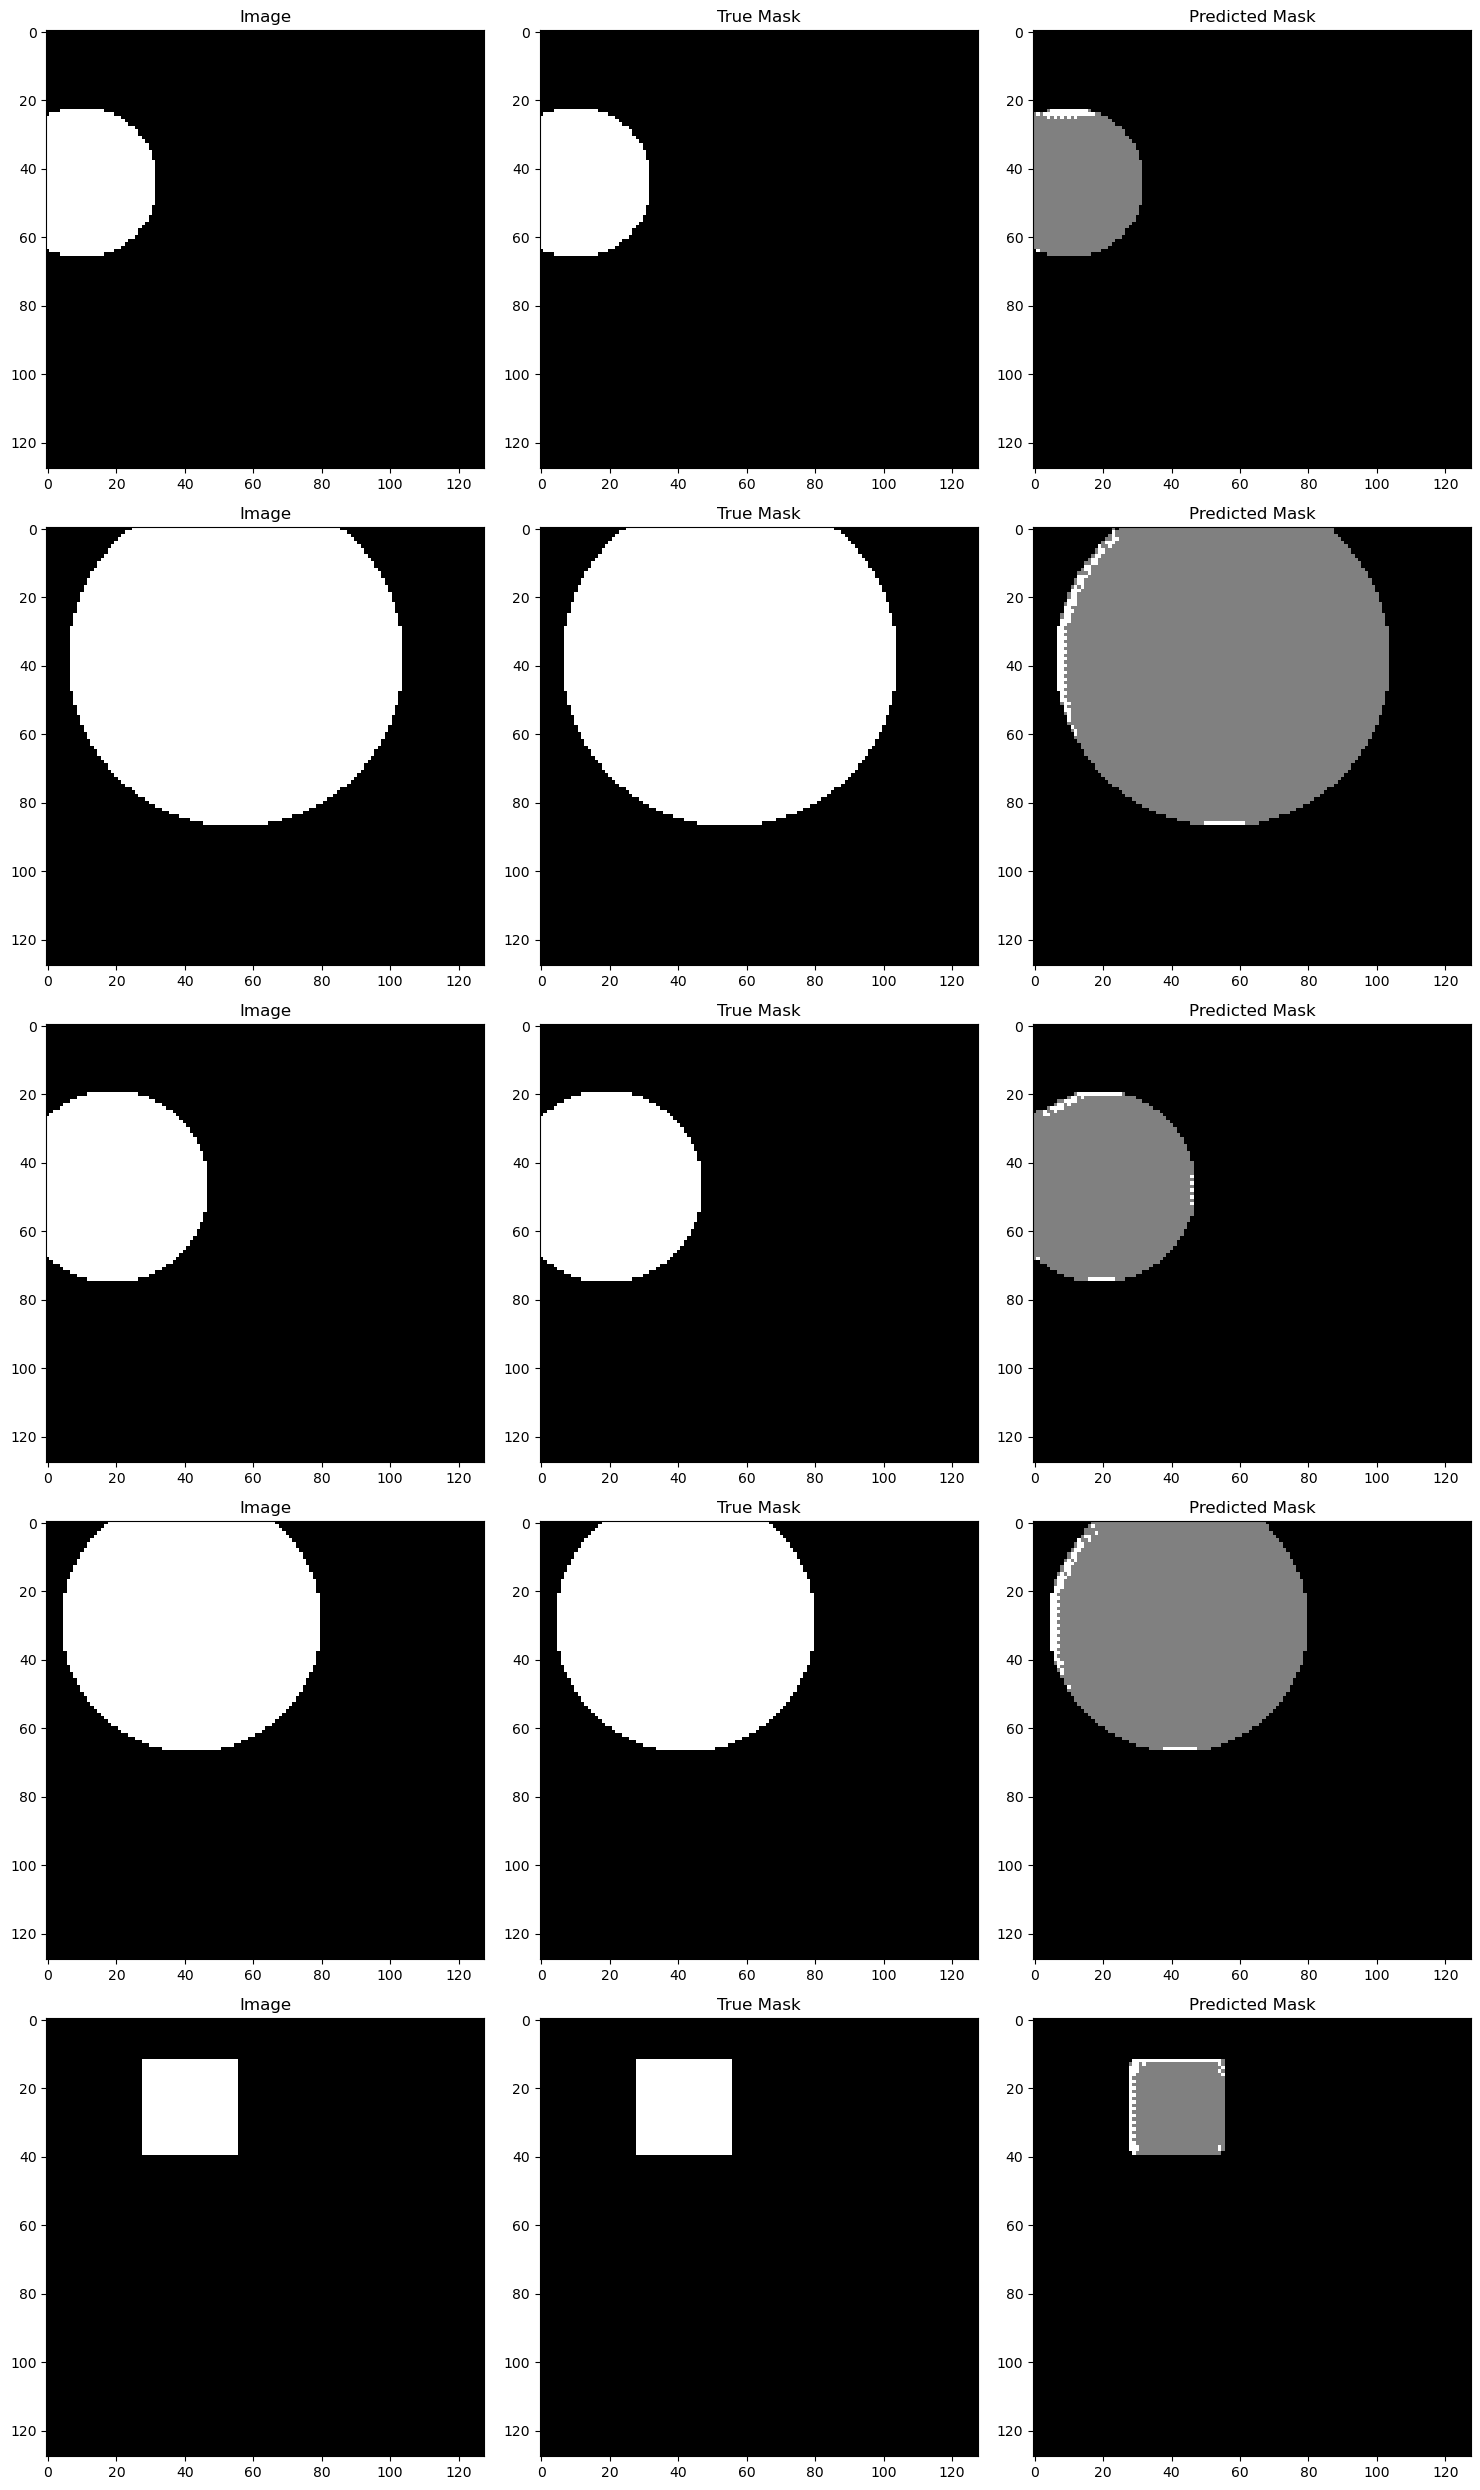

In [6]:
def visualize_predictions(X, y_true, model, num_samples=5):
    y_pred = model.predict(X[:num_samples])
    y_pred = np.argmax(y_pred, axis=-1)
    y_true = np.argmax(y_true[:num_samples], axis=-1)
    
    fig, ax = plt.subplots(num_samples, 3, figsize=(15, 5*num_samples))

    for i in range(num_samples):
        ax[i, 0].imshow(X[i])
        ax[i, 0].set_title("Image")

        ax[i, 1].imshow(y_true[i], cmap='gray')
        ax[i, 1].set_title("True Mask")

        ax[i, 2].imshow(y_pred[i], cmap='gray')
        ax[i, 2].set_title("Predicted Mask")

    plt.tight_layout()
    plt.show()

visualize_predictions(X_val, y_val, model)